In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import matplotlib.cm as cm
from functools import reduce
from operator import mul

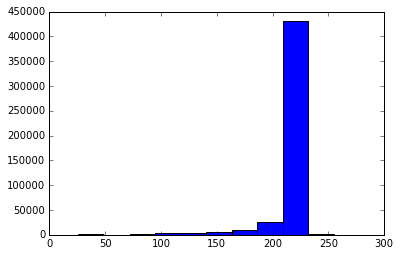

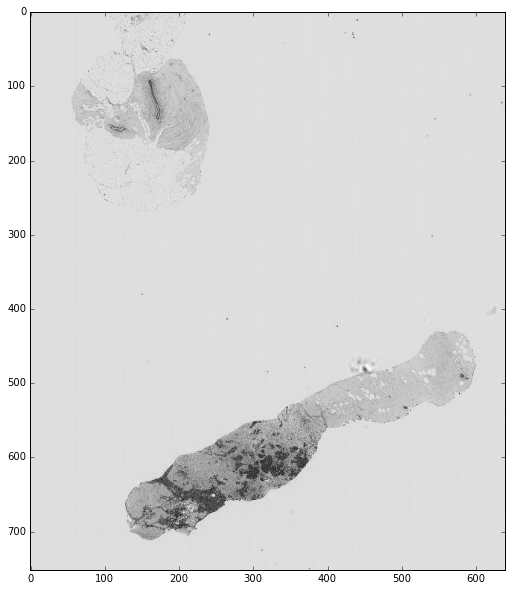

In [71]:
imgPaths = glob.glob("data/cleaned/*.jpg")

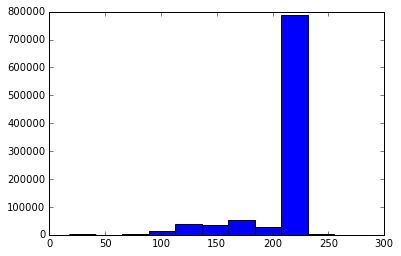

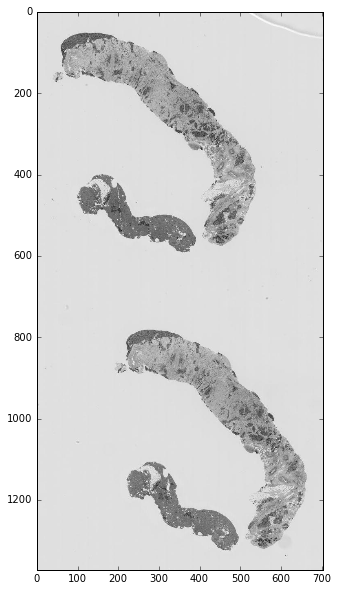

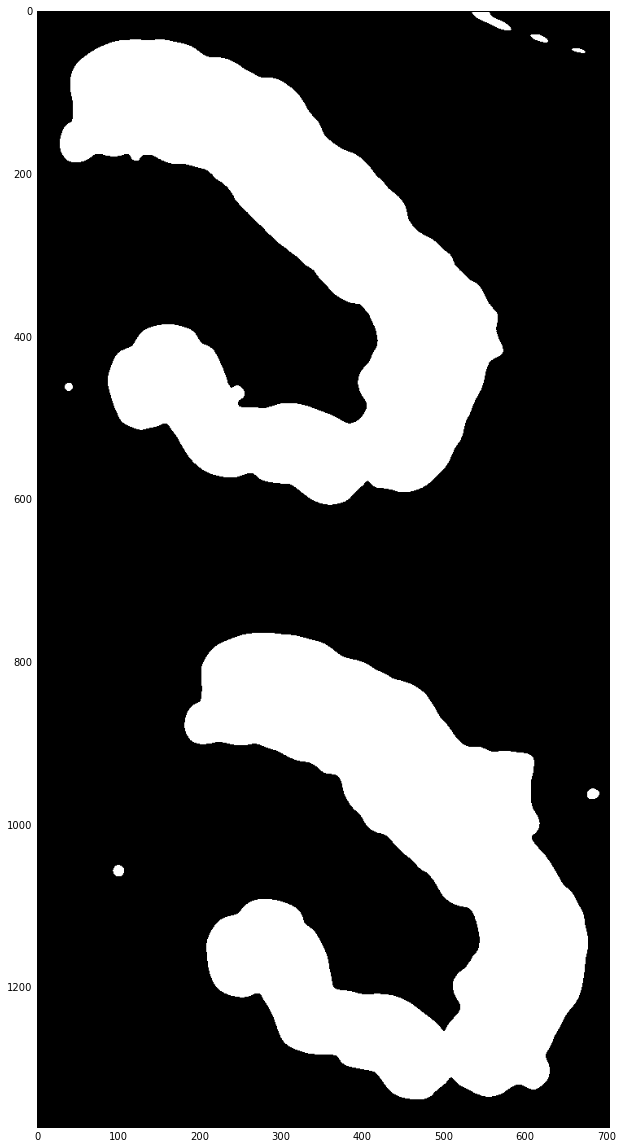

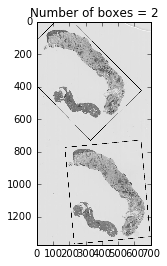

In [94]:
obs = 7
img = cv2.imread(imgPaths[obs],0)
plt.hist(img.flatten())
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(img,cmap=cm.gray)
plt.show()

img1 = cv2.GaussianBlur(img,(47,47),0)
ret,thresh = cv2.threshold(img1,230,255,1)
plt.figure(figsize=(20,20))
plt.imshow(thresh,cmap=cm.gray)
plt.show()

contours,hierarchy = cv2.findContours(thresh, 1, 2)
#x,y,w,h = cv2.boundingRect(cnt)
#cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)

img = cv2.imread(imgPaths[obs],0)
countBoxes = 0
for cnt in contours:

    #cnt = contours[0]
    M = cv2.moments(cnt)

    rect = cv2.minAreaRect(cnt)
    area = reduce(mul,rect[1])
    if area > 5000:
        countBoxes += 1
        box = cv2.cv.BoxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(img,[box],0,(0,255,255),2)
        plt.imshow(img,cmap=cm.gray)
        
plt.title("Number of boxes = %d" % countBoxes)